<a href="https://colab.research.google.com/github/1995anas/Prediction_of_Product_Sales/blob/main/Prediction_of_Prodcut_Sales_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicion of Product Sales
- Author: Anas Abu Alhaija


## Project Overview

## Load and Inspect Data

In [172]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
fpath ='/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_sales = pd.read_csv(fpath)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [174]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

How many rows/columns:

In [175]:
df_sales.shape

(8523, 12)

- There are 8523 rows and 12 columns

Checking the data types:



In [176]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Checking for duplicated data:

In [177]:
df_sales.duplicated().sum()

0

There are no duplicates in rows

--Duplicates in a subset

In [178]:
df_sales.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [179]:
duplicated_Id = df_sales.duplicated(subset=['Item_Identifier'])
duplicated_Id.sum()

6964

we will drop it because Item_Identifier isn't special for each item:

In [180]:
df_sales = df_sales.drop(columns = ['Item_Identifier'])
df_sales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Missing Values
Checking for missing values:

In [181]:
df_sales.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- Missing Values:
  - There are `1463` missing values in the `Item_Weight` column.
  - There are `2410` missing values in the `Outlet_Size` column.


- Confirm that there are no missing values after addressing them

In [182]:
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna('MISSING')
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(-1)
df_sales.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [183]:
df_sales['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [184]:
df_sales['Item_Weight'].value_counts()

-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64

### Fixing Consistency:

In [185]:
obj_col = df_sales.select_dtypes('object').columns
obj_col

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [186]:
for col in obj_col:
  print(f'The value counts for {col}')
  print(df_sales[col].value_counts())
  print('\n')

The value counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


The value counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


The value counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


The value counts for Outlet_Size
Medium     2793
MISSING    2410
Small      2388


In [187]:
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [188]:
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### The summary statistics (max,min,mean) for numerical columns:

In [189]:
num_col = df_sales.select_dtypes('number').columns
num_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [190]:
for col in num_col:
  print(f'The summary statistics (min,max,mean) for {col} are:')
  print(df_sales[col].min())
  print(df_sales[col].max())
  print(df_sales[col].mean())
  print('\n')


The summary statistics (min,max,mean) for Item_Weight are:
-1.0
21.35
10.478936407368296


The summary statistics (min,max,mean) for Item_Visibility are:
0.0
0.328390948
0.06613202877895108


The summary statistics (min,max,mean) for Item_MRP are:
31.29
266.8884
140.9927819781767


The summary statistics (min,max,mean) for Outlet_Establishment_Year are:
1985
2009
1997.8318667135984


The summary statistics (min,max,mean) for Item_Outlet_Sales are:
33.29
13086.9648
2181.288913575032




## Exploratory Data Analysis

### Histograms to view the distributions of numerical features in your dataset:



In [191]:
num_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

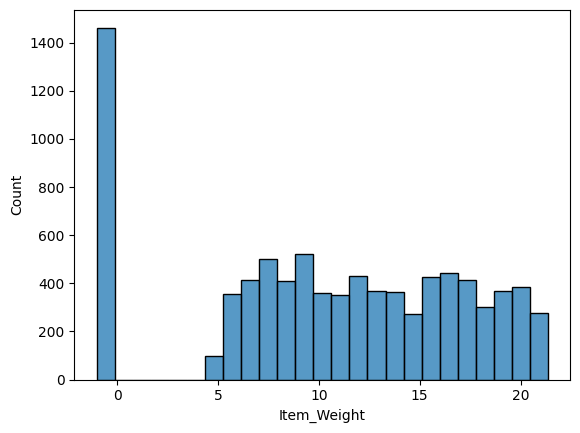

In [192]:
ax = sns.histplot(data=df_sales,x='Item_Weight');

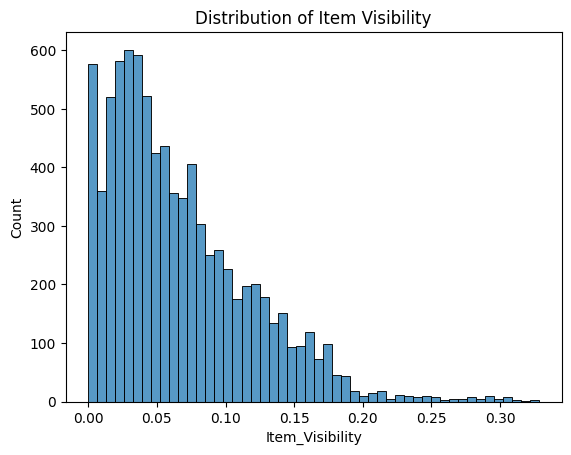

In [193]:
ax = sns.histplot(data=df_sales,x='Item_Visibility');
ax.set_title('Distribution of Item Visibility');

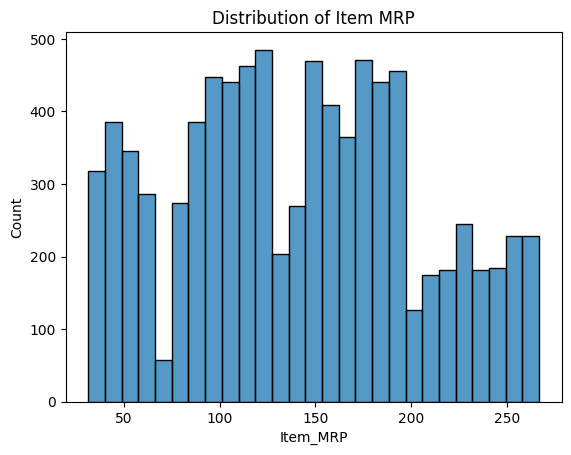

In [194]:
ax = sns.histplot(data=df_sales,x='Item_MRP');
ax.set_title('Distribution of Item MRP');

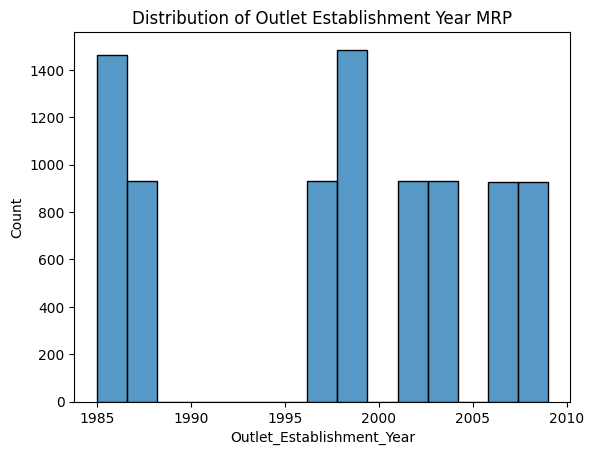

In [195]:
ax = sns.histplot(data=df_sales,x='Outlet_Establishment_Year');
ax.set_title('Distribution of Outlet Establishment Year MRP');

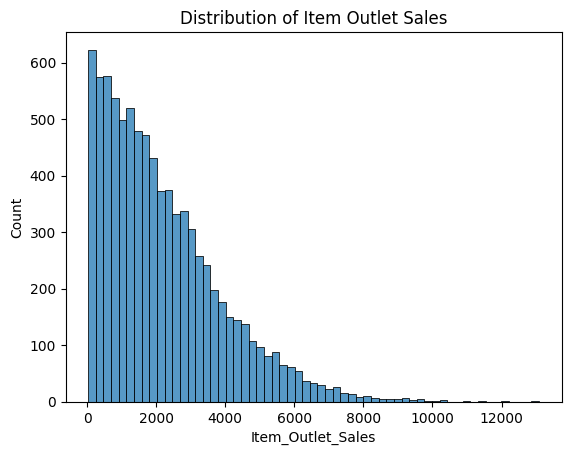

In [196]:
ax = sns.histplot(data=df_sales,x='Item_Outlet_Sales');
ax.set_title('Distribution of Item Outlet Sales');

### Boxplots to view statistical summaries of numerical features in your dataset:

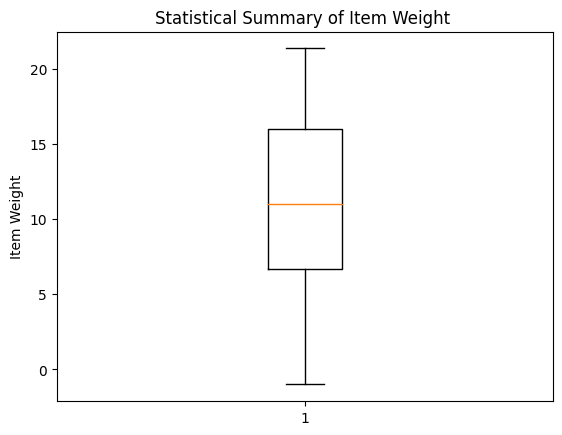

In [197]:
fig, ax= plt.subplots()
data = df_sales['Item_Weight']
ax.boxplot(data);
ax.set_ylabel('Item Weight');
ax.set_title('Statistical Summary of Item Weight ');

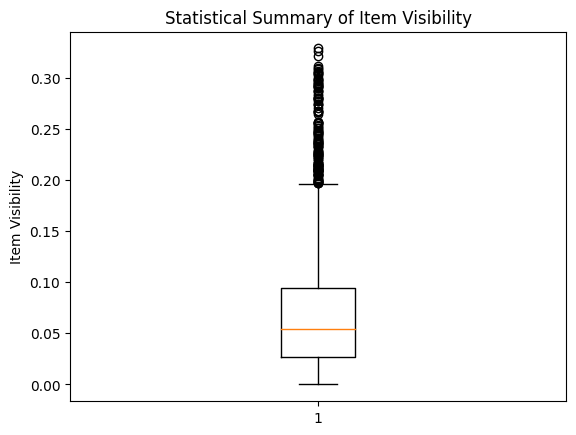

In [198]:
fig, ax= plt.subplots()
data = df_sales['Item_Visibility']
ax.boxplot(data);
ax.set_ylabel('Item Visibility');
ax.set_title('Statistical Summary of Item Visibility');

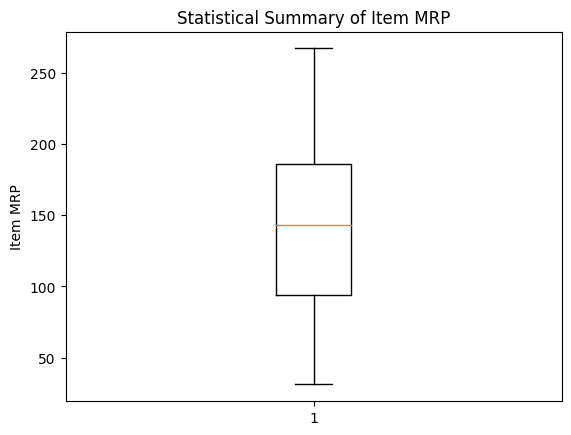

In [199]:
fig, ax= plt.subplots()
data = df_sales['Item_MRP']
ax.boxplot(data);
ax.set_ylabel('Item MRP');
ax.set_title('Statistical Summary of Item MRP');

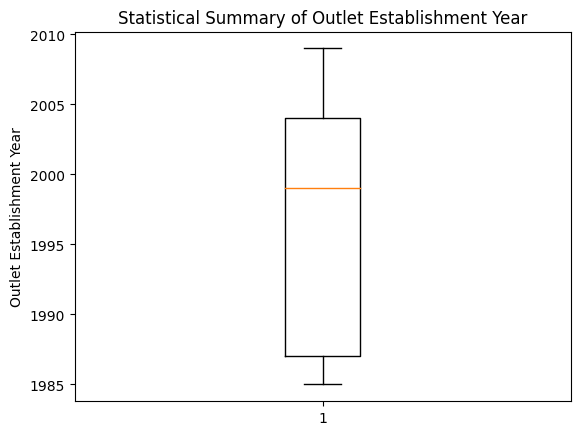

In [200]:
fig, ax= plt.subplots()
data = df_sales['Outlet_Establishment_Year']
ax.boxplot(data);
ax.set_ylabel('Outlet Establishment Year');
ax.set_title('Statistical Summary of Outlet Establishment Year');

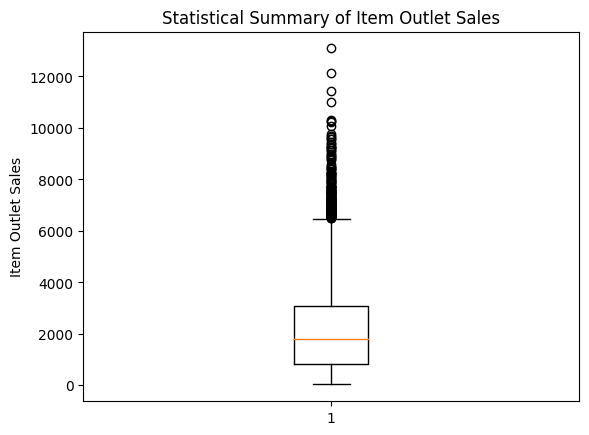

In [201]:
fig, ax= plt.subplots()
data = df_sales['Item_Outlet_Sales']
ax.boxplot(data);
ax.set_ylabel('Item Outlet Sales');
ax.set_title('Statistical Summary of Item Outlet Sales');

### Countplots to view the frequency of each class of categorial features in your dataset:

In [202]:
obj_col

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

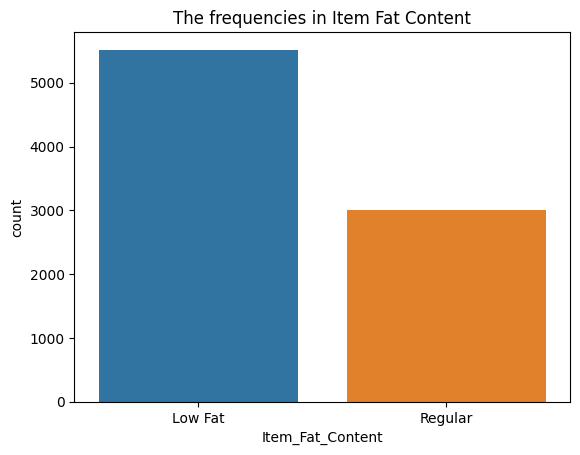

In [203]:
ax = sns.countplot(data=df_sales, x='Item_Fat_Content')
ax.set_title('The frequencies in Item Fat Content');

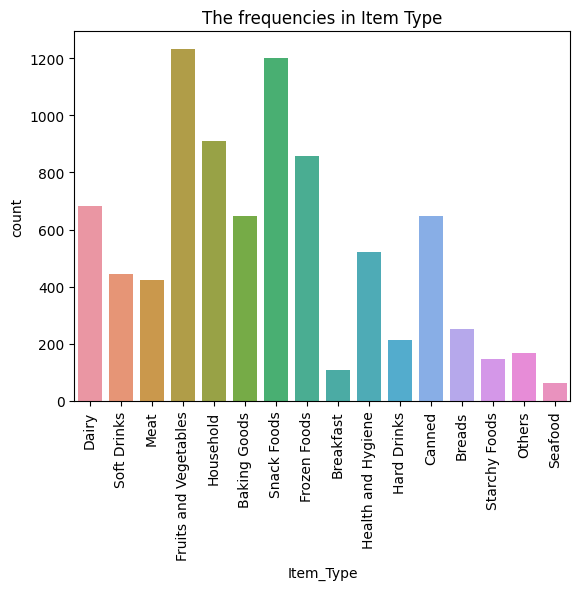

In [204]:
ax = sns.countplot(data=df_sales, x='Item_Type')
ax.tick_params(axis='x', rotation = 90);
ax.set_title('The frequencies in Item Type');

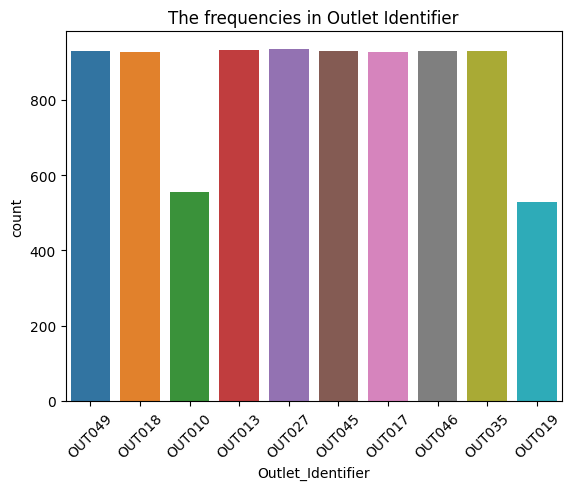

In [205]:
ax = sns.countplot(data=df_sales, x='Outlet_Identifier');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('The frequencies in Outlet Identifier');

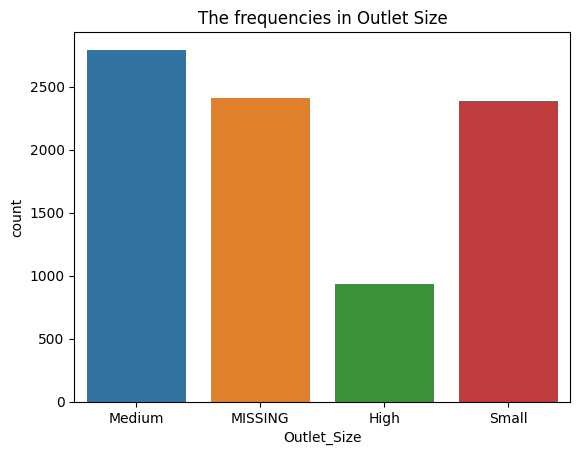

In [206]:
ax = sns.countplot(data=df_sales, x='Outlet_Size');
ax.set_title('The frequencies in Outlet Size');

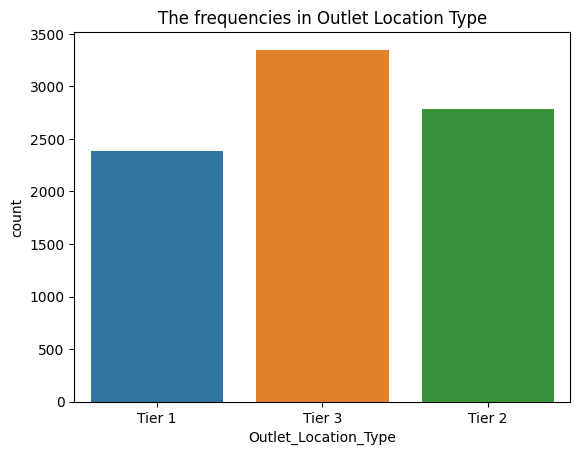

In [207]:
ax = sns.countplot(data=df_sales, x='Outlet_Location_Type');
ax.set_title('The frequencies in Outlet Location Type');

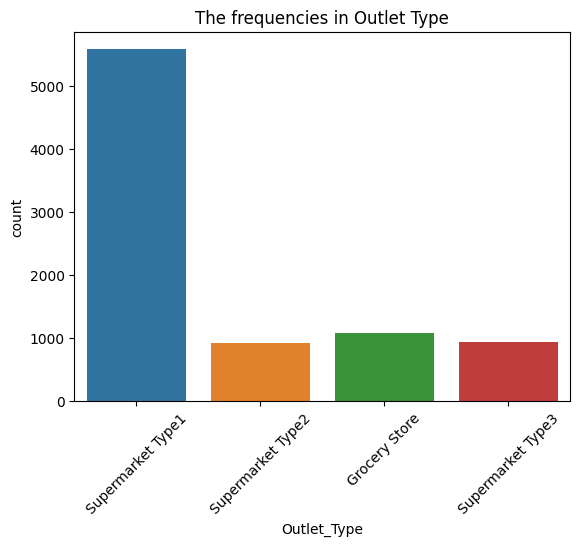

In [208]:
ax = sns.countplot(data=df_sales, x='Outlet_Type');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('The frequencies in Outlet Type');

### Heatmap to view the correlation between features:

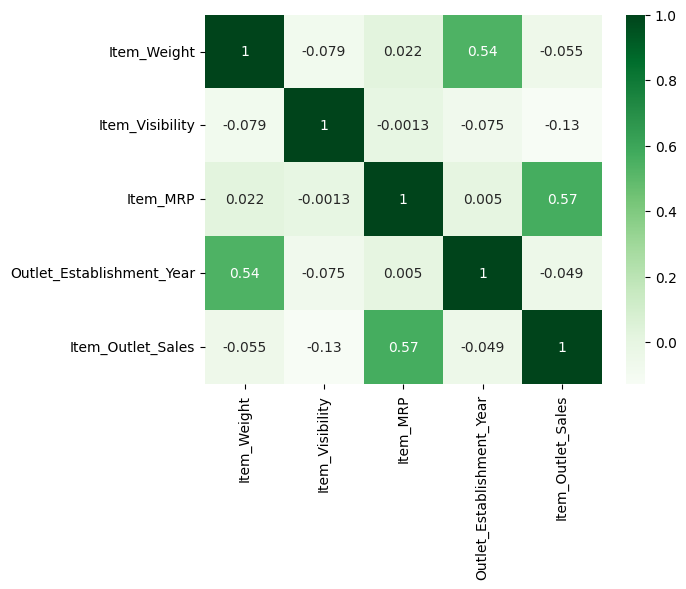

In [209]:
corr = df_sales.corr(numeric_only = True)
corr.round(2)
sns.heatmap(corr,cmap = 'Greens',annot= True);

## Feature Inspection

In [210]:
df = df_sales.copy()

In [211]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- Removing the placeholders and replace them with null values.

In [212]:
df['Item_Weight'].describe()

count    8523.000000
mean       10.478936
std         6.720742
min        -1.000000
25%         6.650000
50%        11.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [213]:
# remove placeholder "MISSING" and replace them with null values for Item_Weight
filter_item_weight = df['Item_Weight'] == -1
df.loc[filter_item_weight,'Item_Weight'] = np.nan

In [214]:
df['Item_Weight'].isna().sum()

1463

In [215]:
df['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [216]:
filter_Outlet_Size = df['Outlet_Size'] == "MISSING"
df.loc[filter_Outlet_Size,'Outlet_Size'] = np.nan

In [217]:
df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

- target column: Item_Outlet_Sales

In [218]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [219]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

### Item_Weight

- Item_Weight: Weight of product

In [220]:
# Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

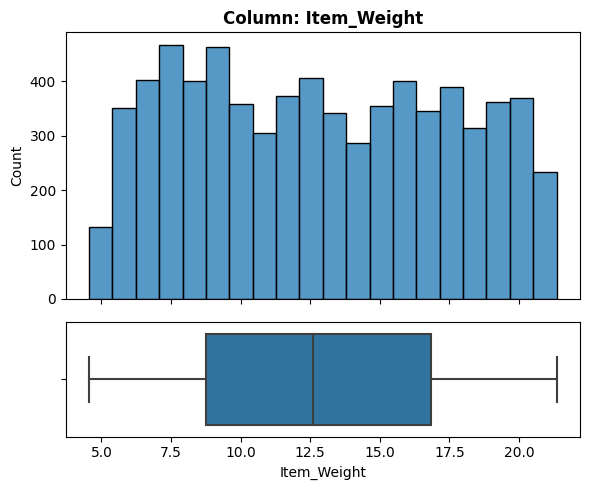

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [221]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Numeric
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 (17.17%)
  - As above graph, Impute with mean best of than placeholder (-1) or other

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Not applicable (Numeric feature)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes



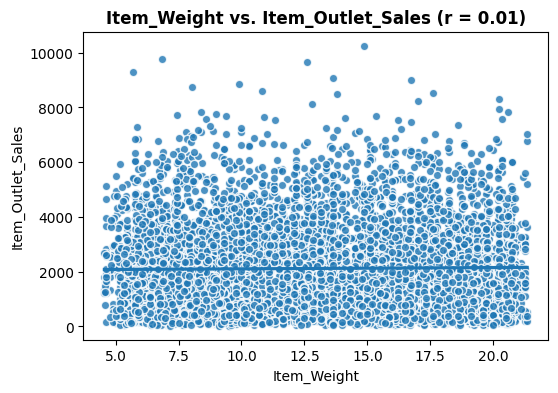

In [223]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - NO, weight of item doesn't effect on it's sales
  - Does this feature appear to be a predictor of the target?
    - No, it's a very weak correlation between of them

___

### Item_Fat_Content

- Item_Fat_Content: Whether the product is low-fat or regular

In [224]:
# Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

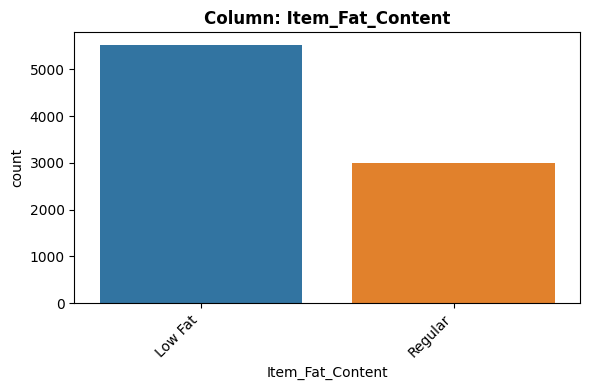

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [225]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - zero

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - very low

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



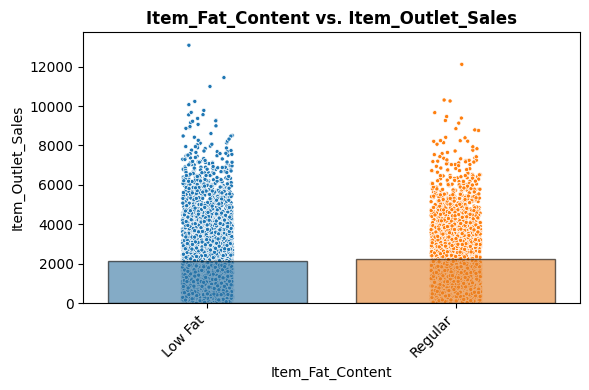

In [226]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think more people prefer low fat than regular
  - Does this feature appear to be a predictor of the target?
    - NO, low fat and regular have same mean and range nearly  

___

### Item_Visibility

- Item_Visibility: The percentage of total display area of all products in a store allocated to the particular product

In [227]:
# Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

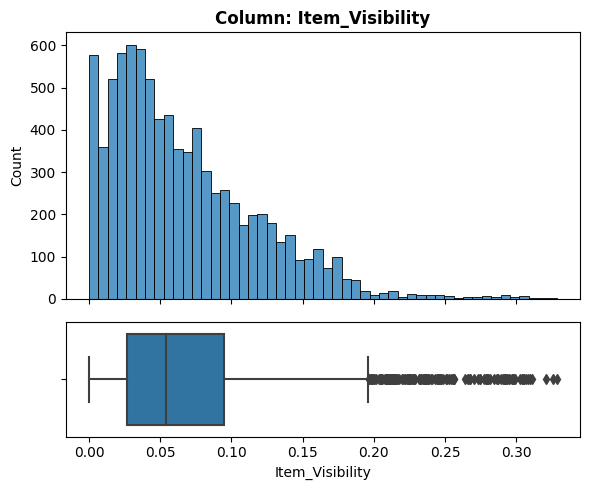

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [228]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - zero

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Not applicable (numeric)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



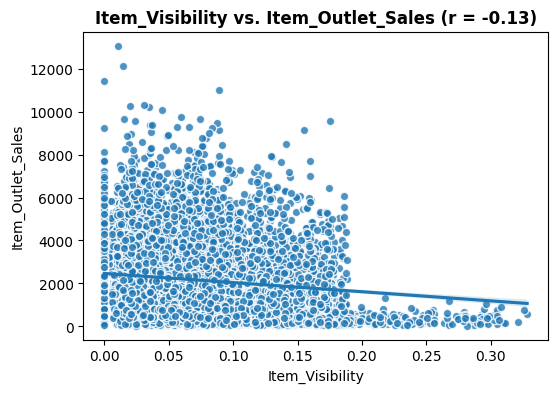

In [229]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, the total display area can help to increase sales
  - Does this feature appear to be a predictor of the target?
    - Yes, but opposite of what I expected the nature of relation

___

### Item_Type

- Item_Type: The category to which the product belongs

In [230]:
# Confirming the dtype to select correct EDA function
feature = "Item_Type"
df[feature].dtype

dtype('O')

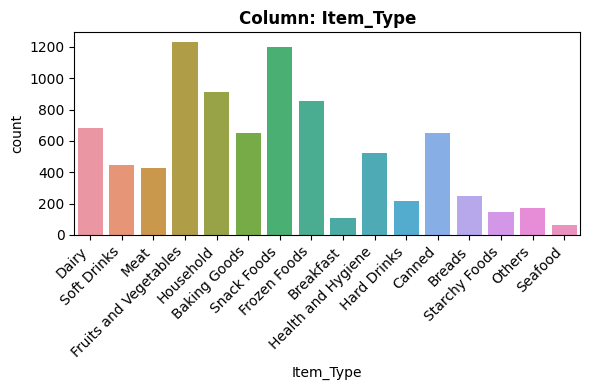

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [231]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - zero

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - High cardinality

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



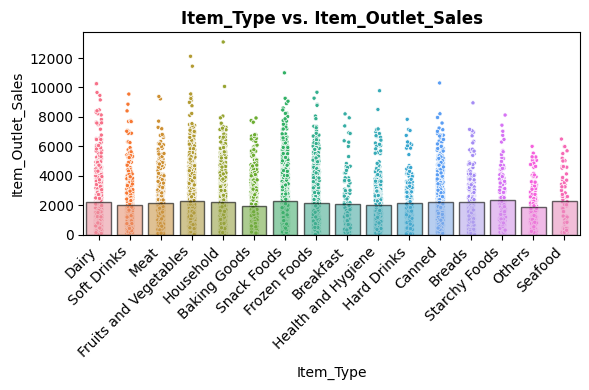

In [232]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - NO

___

### Item_MRP

- Item_MRP: Maximum Retail Price (list price) of the product

In [233]:
# Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

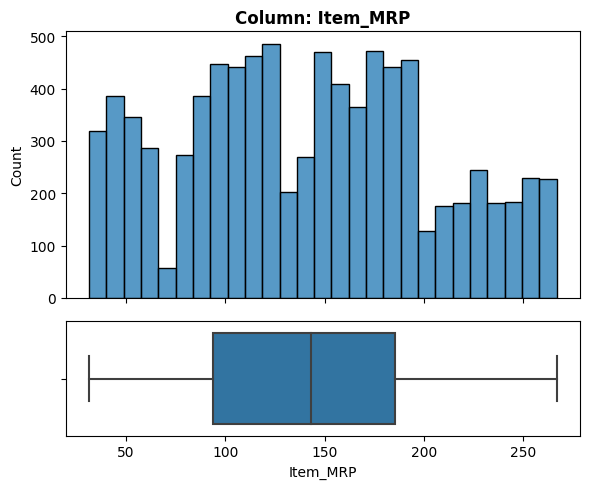

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [234]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - Zero

3. Is the feature constant or quasi-constant?
  - NO

4. What is the cardinality? Is it high?
  - Not applicable (numeric)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



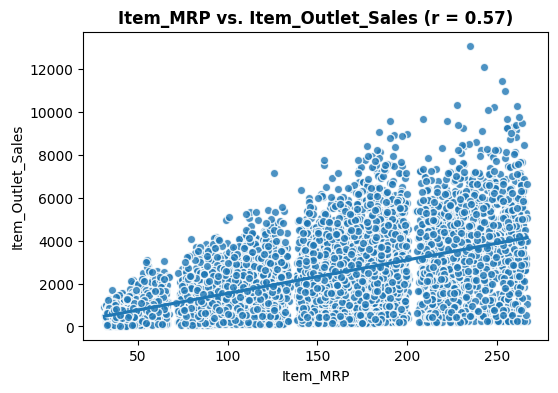

In [235]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes, but opposite of what I expected

___

### Outlet_Identifier

- Outlet_Identifier: Store ID

In [236]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
df[feature].dtype

dtype('O')

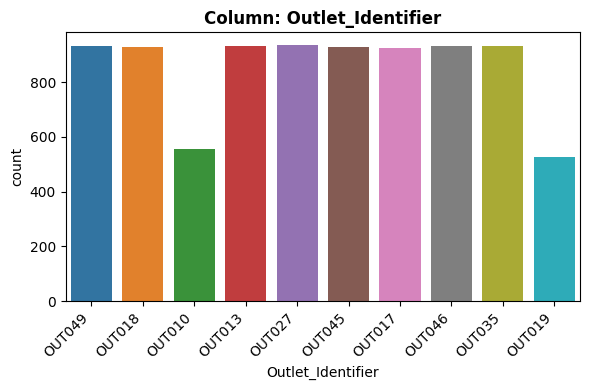

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [237]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - Zero

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Not High but very close

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



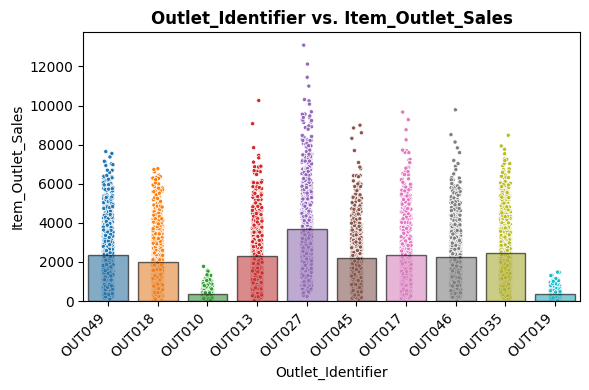

In [238]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - NO
  - Does this feature appear to be a predictor of the target?
    - Yes

___

### Outlet_Establishment_Year

- Outlet_Establishment_Year: The year in which store was established

In [239]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df[feature].dtype

dtype('int64')

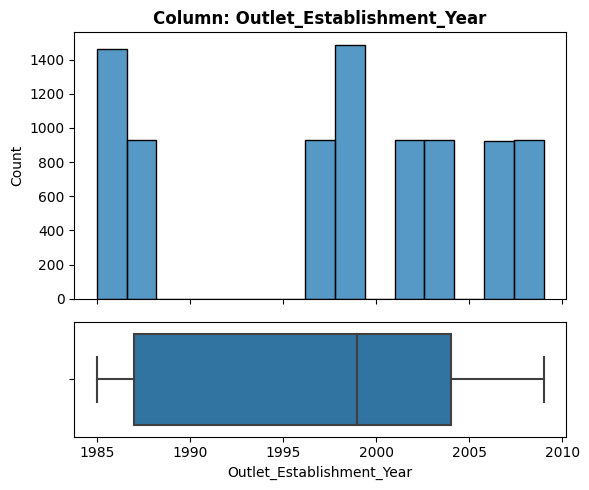

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [240]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - Zero

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Not high

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



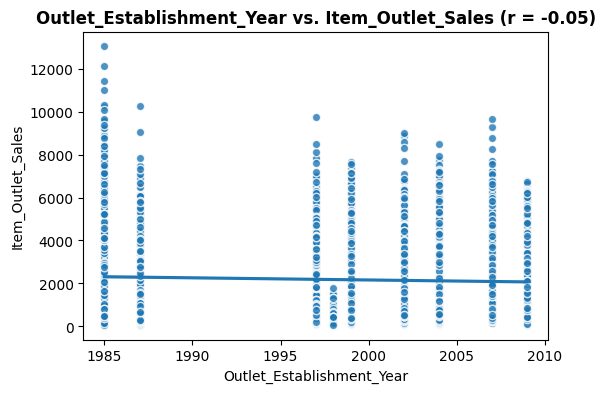

In [241]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No, on my opinion year of established don't affect sales
  - Does this feature appear to be a predictor of the target?
    - No

___

### Outlet_Size

- Outlet_Size: The size of the store in terms of ground area covered

In [242]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

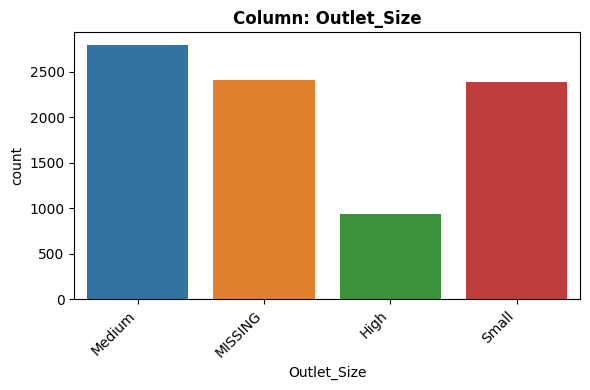

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [243]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 (28.28%)
  - Best choice is impute with placeholder "MISSING"

3. Is the feature constant or quasi-constant?
  - NO

4. What is the cardinality? Is it high?
  - Low cardinality

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - NO



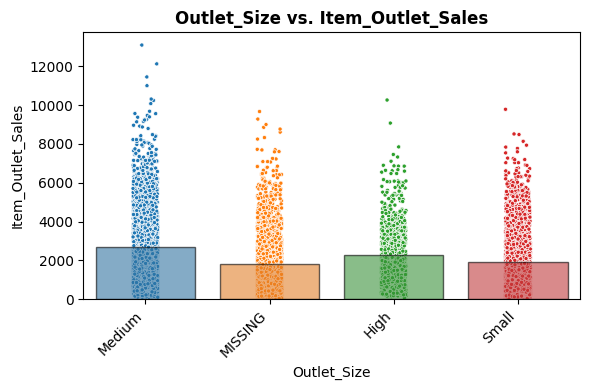

In [244]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes, medium size of store have a higher average and range item sales.

___

### Outlet_Location_Type

- Outlet_Location_Type: The type of area in which the store is located

In [245]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df[feature].dtype

dtype('O')

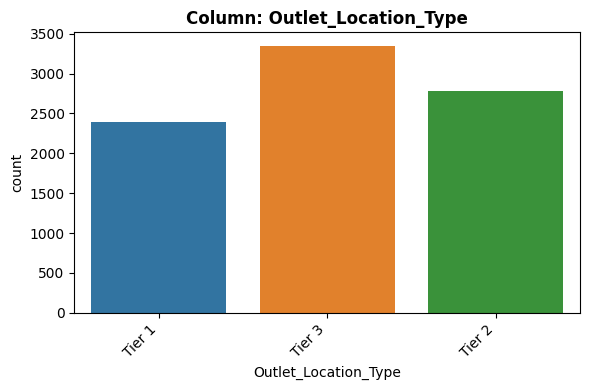

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [246]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - Zero

3. Is the feature constant or quasi-constant?
  - NO

4. What is the cardinality? Is it high?
  - Low carinality

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - NO



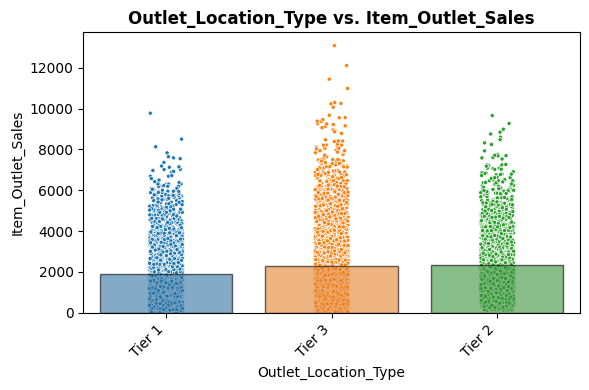

In [247]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, i think location of store affect on sales
  - Does this feature appear to be a predictor of the target?
    - Yes
___

### Outlet_Type

- Outlet_Type: Whether the outlet is a grocery store or some sort of supermarket


In [248]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

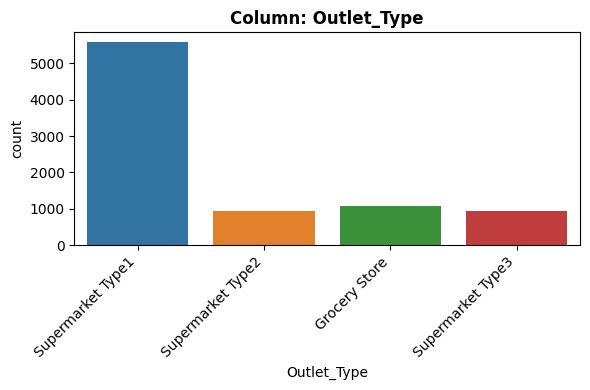

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [249]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - Zero

3. Is the feature constant or quasi-constant?
  - NO

4. What is the cardinality? Is it high?
  - low carinality

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - NO



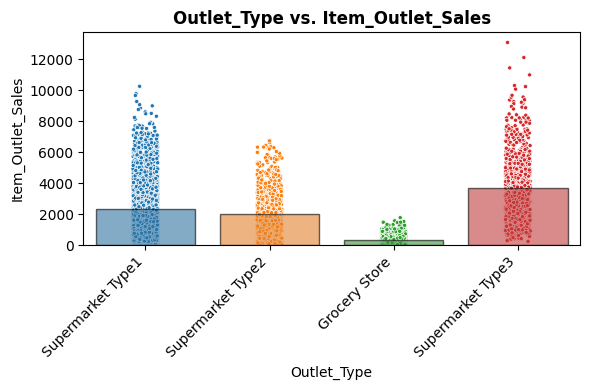

In [250]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes, appear for us average of supermarket or grocery store sales not same.

___